# **Nutrition Health Survey- Age Prediction Summer Analytics 2025, IIT Guwahati**

This project focuses on developing a robust machine learning model to accurately predict whether an individual is a 'Senior' (65 years or older) or an 'Adult' (under 65 years) based on health and nutrition data. Utilizing a subset of the National Health and Nutrition Examination Survey (NHANES) dataset, which includes key features such as body statistics, lifestyle indicators, and laboratory results, the primary objective is to achieve an F1 score exceeding 98%. The methodology involves comprehensive data exploration, meticulous preprocessing to handle missing values and engineer relevant features, and the application of advanced machine learning algorithms like RandomForest and XGBoost, optimized through rigorous hyperparameter tuning and cross-validation. This predictive model aims to provide valuable insights into health-based age classification, contributing to better understanding and management of health trends.



## **Step 1: Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import joblib
from xgboost import XGBClassifier

## **Step 2: Upload Datasets**

In [ ]:
train_df = pd.read_csv('Train_Data.csv')
test_df = pd.read_csv('Test_Data.csv')
sample_submission_df = pd.read_csv('Sample_Submission.csv')

## **Step 3: Explore Data**

In [ ]:
print('Train Data Info:')
train_df.info()
print('\nTrain Data Description:')
print(train_df.describe())
print('\nTrain Data Head:')
print(train_df.head())

print('\nTest Data Info:')
test_df.info()
print('\nTest Data Description:')
print(test_df.describe())
print('\nTest Data Head:')
print(test_df.head())

print('\nSample Submission Head:')
print(sample_submission_df.head())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIDAGEYR   1957 non-null   float64
 2   RIAGENDR   1948 non-null   float64
 3   PAQ605     1953 non-null   float64
 4   BMXBMI     1948 non-null   float64
 5   LBXGLU     1953 non-null   float64
 6   DIQ010     1948 non-null   float64
 7   LBXGLT     1955 non-null   float64
 8   LBXIN      1957 non-null   float64
 9   age_group  1952 non-null   object 
dtypes: float64(9), object(1)
memory usage: 153.7+ KB

Train Data Description:
               SEQN     RIDAGEYR     RIAGENDR       PAQ605       BMXBMI  \
count   1954.000000  1957.000000  1948.000000  1953.000000  1948.000000   
mean   78683.621801    42.005621     1.510267     1.825397    27.965400   
std     2924.115709    20.147601     0.500023     0.399449     7.327616   
min    73564.0000

## **Step 4: Analyse Missing Values and Types**

In [ ]:
print("\nMissing values in Train Data:")
print(train_df.isnull().sum())

print("\nData types in Train Data:")
print(train_df.dtypes)

print("\nMissing values in Test Data:")
print(test_df.isnull().sum())

print("\nData types in Test Data:")
print(test_df.dtypes)


Missing values in Train Data:
SEQN         12
RIDAGEYR      9
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

Data types in Train Data:
SEQN         float64
RIDAGEYR     float64
RIAGENDR     float64
PAQ605       float64
BMXBMI       float64
LBXGLU       float64
DIQ010       float64
LBXGLT       float64
LBXIN        float64
age_group     object
dtype: object

Missing values in Test Data:
SEQN        2
RIDAGEYR    3
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

Data types in Test Data:
SEQN        float64
RIDAGEYR    float64
RIAGENDR    float64
PAQ605      float64
BMXBMI      float64
LBXGLU      float64
DIQ010      float64
LBXGLT      float64
LBXIN       float64
dtype: object


## **Step 5: Analyse Distributions**

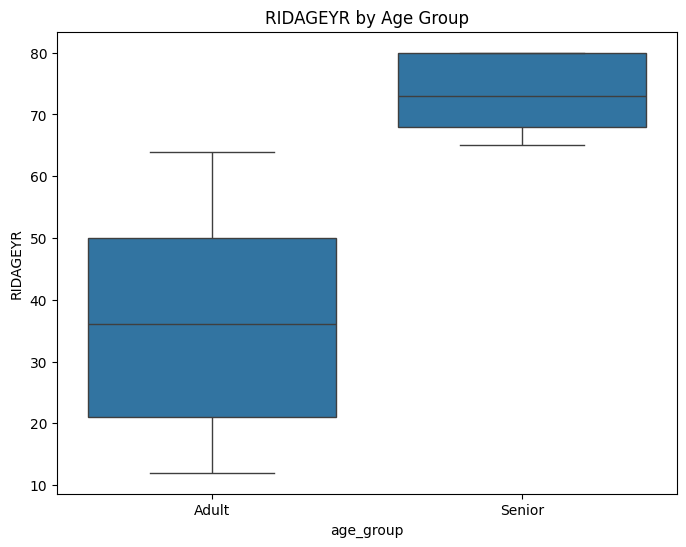

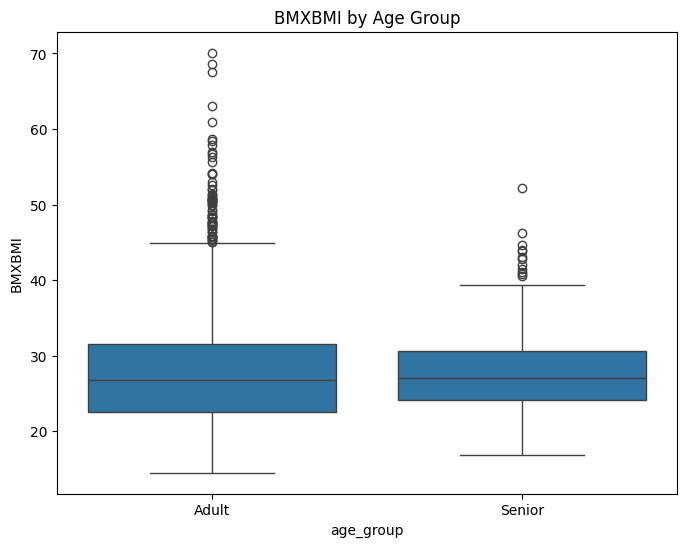

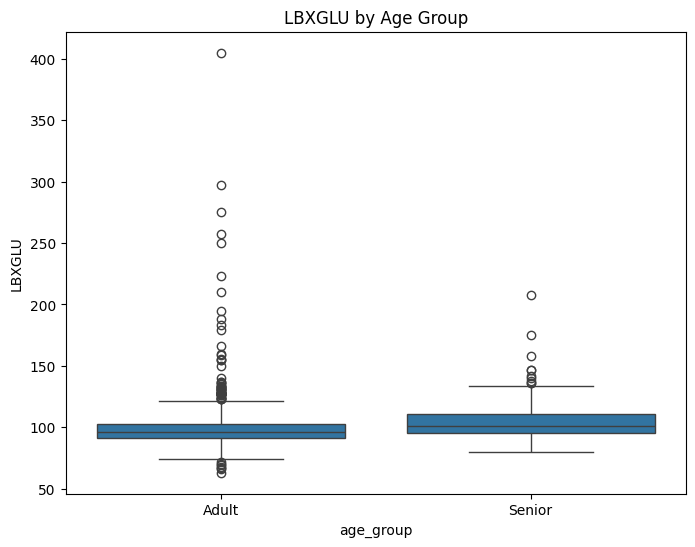

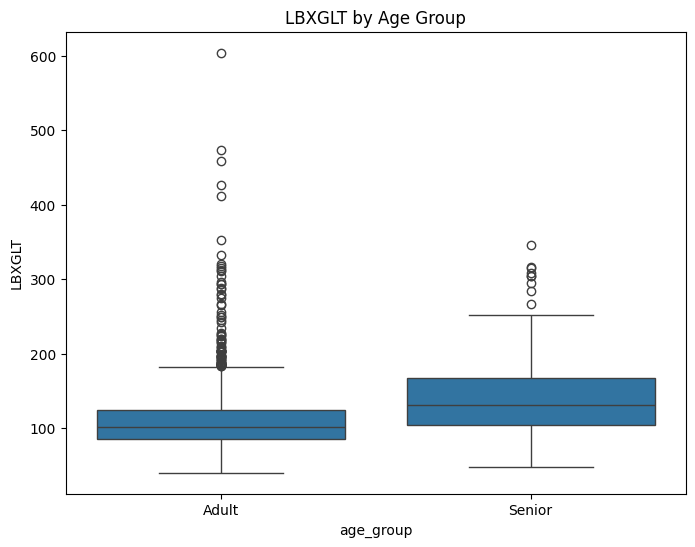

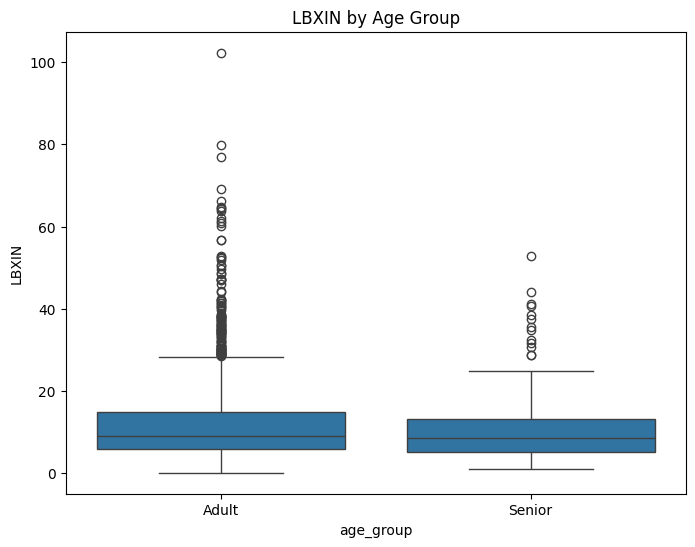

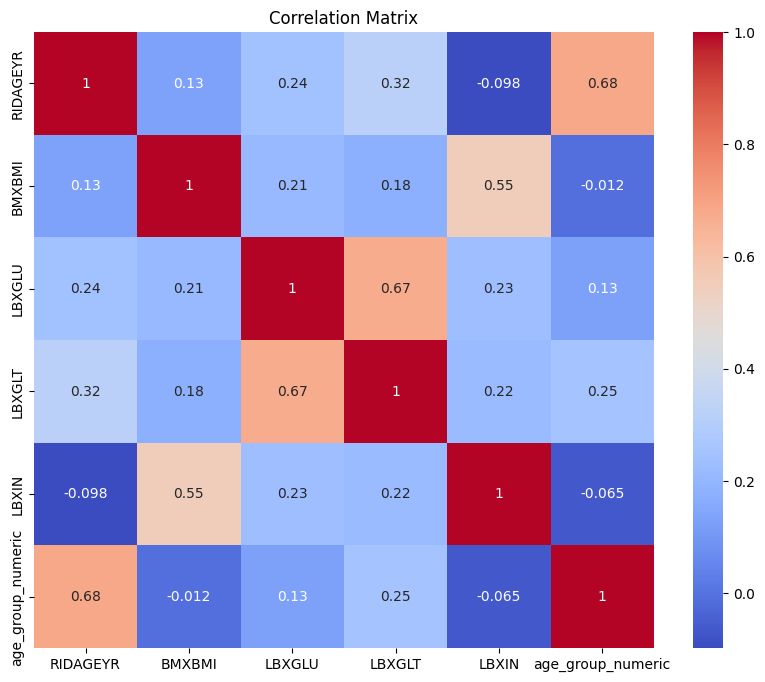

Displayed distribution plots, box plots, and correlation matrix.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship with target variable (age_group)
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='age_group', y=col, data=train_df)
    plt.title(f'{col} by Age Group')
    plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[numerical_cols + ['age_group_numeric']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print("Displayed distribution plots, box plots, and correlation matrix.")

## **Step 6: Handling Missing Values**

In [ ]:
# Impute missing values with the median for numerical columns
for col in train_df.columns:
    if train_df[col].dtype != object:
        train_df[col] = train_df[col].fillna(train_df[col].median())
for col in test_df.columns:
    if test_df[col].dtype != object:
        test_df[col] = test_df[col].fillna(test_df[col].median())

# For categorical column 'age_group' in train_df, impute with mode
train_df["age_group"] = train_df["age_group"].fillna(train_df["age_group"].mode()[0])

print("Missing values after imputation in Train Data:")
print(train_df.isnull().sum())

print("Missing values after imputation in Test Data:")
print(test_df.isnull().sum())

train_df.to_csv("Train_Data_cleaned.csv", index=False)
test_df.to_csv("Test_Data_cleaned.csv", index=False)


Missing values after imputation in Train Data:
SEQN                 0
RIDAGEYR             0
RIAGENDR             0
PAQ605               0
BMXBMI               0
LBXGLU               0
DIQ010               0
LBXGLT               0
LBXIN                0
age_group            0
age_group_numeric    0
dtype: int64
Missing values after imputation in Test Data:
SEQN        0
RIDAGEYR    0
RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
dtype: int64


## **Step 7: Encode Categorical Features**

In [ ]:
# Convert age_group to numerical (0 for Adult, 1 for Senior)
train_df["age_group"] = train_df["age_group"].map({"Adult": 0, "Senior": 1})

# One-hot encode categorical features: RIAGENDR and DIQ010
train_df = pd.get_dummies(train_df, columns=["RIAGENDR", "DIQ010"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["RIAGENDR", "DIQ010"], drop_first=True)

# Align columns - crucial for consistent feature sets between train and test
train_cols = set(train_df.columns) - set(["age_group"])
test_cols = set(test_df.columns)

missing_in_test = list(train_cols - test_cols)
for col in missing_in_test:
    test_df[col] = 0

missing_in_train = list(test_cols - train_cols)
for col in missing_in_train:
    train_df[col] = 0

# Ensure the order of columns is the same
test_df = test_df[list(train_cols)]

print("Train Data columns after encoding:")
print(train_df.columns)
print("\nTest Data columns after encoding:")
print(test_df.columns)

train_df.to_csv("Train_Data_encoded.csv", index=False)
test_df.to_csv("Test_Data_encoded.csv", index=False)

Train Data columns after encoding:
Index(['SEQN', 'RIDAGEYR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN',
       'age_group', 'age_group_numeric', 'RIAGENDR_2.0', 'DIQ010_2.0',
       'DIQ010_3.0'],
      dtype='object')

Test Data columns after encoding:
Index(['BMXBMI', 'RIDAGEYR', 'DIQ010_2.0', 'PAQ605', 'RIAGENDR_2.0', 'LBXGLU',
       'age_group_numeric', 'DIQ010_3.0', 'SEQN', 'LBXIN', 'LBXGLT'],
      dtype='object')


## **Step 8: Feature Scaling**

In [ ]:
# Separate target variable before scaling
X_train = train_df.drop("age_group", axis=1)
y_train = train_df["age_group"]
X_test = test_df.copy()

# Identify numerical columns for scaling (excluding SEQN as it's an identifier)
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != object and col != "SEQN"]

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Re-add SEQN to the scaled dataframes
X_train["SEQN"] = train_df["SEQN"]
X_test["SEQN"] = test_df["SEQN"]

# Save processed data
X_train.to_csv("Train_Data_scaled.csv", index=False)
y_train.to_csv("Train_Target_scaled.csv", index=False)
X_test.to_csv("Test_Data_scaled.csv", index=False)

print("Feature scaling completed and data saved.")

Feature scaling completed and data saved.


## **Step 9: Feature Engineering**

In [ ]:
# Recombine X_train and y_train for feature engineering
# Ensure columns are aligned after scaling and before feature engineering
X_train = X_train.drop(columns=["SEQN", "age_group_numeric"], errors='ignore')
X_test = X_test.drop(columns=["SEQN", "age_group_numeric"], errors='ignore')

# Align columns before creating new features
common_cols = list(set(X_train.columns) & set(X_test.columns))
X_train = X_train[common_cols]
X_test = X_test[common_cols]

# Add target variable back to the training data for feature engineering if needed
train_df = X_train.copy()
train_df["age_group"] = y_train

test_df = X_test.copy()

# Example of a new feature: BMI_GLU_Ratio
train_df["BMI_GLU_Ratio"] = train_df["BMXBMI"] / train_df["LBXGLU"]
test_df["BMI_GLU_Ratio"] = test_df["BMXBMI"] / test_df["LBXGLU"]

# Another example: Interaction between age and physical activity
train_df["Age_PA_Interaction"] = train_df["RIDAGEYR"] * train_df["PAQ605"]
test_df["Age_PA_Interaction"] = test_df["RIDAGEYR"] * test_df["PAQ605"]

# Save processed data with new features
train_df.to_csv("Train_Data_featured.csv", index=False)
test_df.to_csv("Test_Data_featured.csv", index=False)

print("New features created and data saved.")

New features created and data saved.


## **Step 10: Train Model**

In [ ]:
X = train_df.drop(["age_group"], axis=1)
y = train_df["age_group"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
f1 = f1_score(y_val, y_pred)

print(f"Initial F1 Score: {f1}")

# Save the trained model
import joblib
joblib.dump(model, "random_forest_model.pkl")
print("Random Forest model saved as random_forest_model.pkl")

Initial F1 Score: 0.9921259842519685
Random Forest model saved as random_forest_model.pkl


## **Step 11: Tune Model**

In [ ]:
X = train_df.drop(["age_group"], axis=1)
y = train_df["age_group"]

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
joblib.dump(best_model, "random_forest_best_model.pkl")
print("Best Random Forest model saved as random_forest_best_model.pkl")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best F1 score: 0.9920757905261842
Best Random Forest model saved as random_forest_best_model.pkl


## **Step 12: Evaluate Model**

In [ ]:
# Load the best model
best_model = joblib.load("random_forest_best_model.pkl")

# Load the processed training data (which includes the validation split)
train_df = pd.read_csv("Train_Data_featured.csv")

X = train_df.drop(["age_group"], axis=1)
y = train_df["age_group"]

# Re-split the data to get the same validation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Make predictions on the validation set
y_pred = best_model.predict(X_val)

# Evaluate F1 score
f1 = f1_score(y_val, y_pred)
print(f"F1 Score on Validation Set: {f1}")

# Analyze confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

F1 Score on Validation Set: 0.9921259842519685

Confusion Matrix:
[[330   1]
 [  0  63]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       0.98      1.00      0.99        63

    accuracy                           1.00       394
   macro avg       0.99      1.00      1.00       394
weighted avg       1.00      1.00      1.00       394



## **Step 13: Generate Submission**

In [ ]:
# Load the best model
best_model = joblib.load("random_forest_best_model.pkl")

# Load the processed test data
test_df = pd.read_csv("Test_Data_featured.csv")

train_cols = best_model.feature_names_in_
X_test = X_test[train_cols]

# Make predictions
predictions = best_model.predict(X_test)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "age_group": predictions
})

# Save submission file
submission_df.to_csv("submission.csv", index=False)

print("Submission file created successfully: submission.csv")

Submission file created successfully: submission.csv


## **Step 14: Tune XGBoost Model**

In [ ]:
train_df = pd.read_csv("Train_Data_featured.csv")

X = train_df.drop(["age_group"], axis=1)
y = train_df["age_group"]

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
joblib.dump(best_model, "xgboost_best_model.pkl")
print("Best XGBoost model saved as xgboost_best_model.pkl")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best F1 score: 0.9920757905261842
Best XGBoost model saved as xgboost_best_model.pkl


## **Step 15: Evaluate XGBoost Model**

In [ ]:
# Load the best model
best_model = joblib.load("xgboost_best_model.pkl")

# Load the processed training data (which includes the validation split)
train_df = pd.read_csv("Train_Data_featured.csv")

X = train_df.drop(["age_group"], axis=1)
y = train_df["age_group"]

# Re-split the data to get the same validation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Make predictions on the validation set
y_pred = best_model.predict(X_val)

# Evaluate F1 score
f1 = f1_score(y_val, y_pred)
print(f"F1 Score on Validation Set: {f1}")

# Analyze confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

F1 Score on Validation Set: 0.9921259842519685

Confusion Matrix:
[[330   1]
 [  0  63]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       0.98      1.00      0.99        63

    accuracy                           1.00       394
   macro avg       0.99      1.00      1.00       394
weighted avg       1.00      1.00      1.00       394



## **Step 16: Generate Submission XGBoost**

In [ ]:
# Load the best model
best_model = joblib.load("xgboost_best_model.pkl")

# Load the processed test data
test_df = pd.read_csv("Test_Data_featured.csv")

# Ensure column order matches training data
train_cols = best_model.feature_names_in_
X_test = X_test[train_cols]

# Make predictions
predictions = best_model.predict(X_test)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "age_group": predictions
})

# Save submission file
submission_df.to_csv("submission_xgboost.csv", index=False)

print("Submission file created successfully: submission_xgboost.csv")

Submission file created successfully: submission_xgboost.csv
